In [1]:
%matplotlib inline

from glob import glob
from pprint import pprint
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

'Ready'

'Ready'

In [2]:
def iter_metrics(globspec="metrics/metrics_*.json"):
    for p in glob(globspec):
        with open(p) as fp:
            yield json.load(fp)

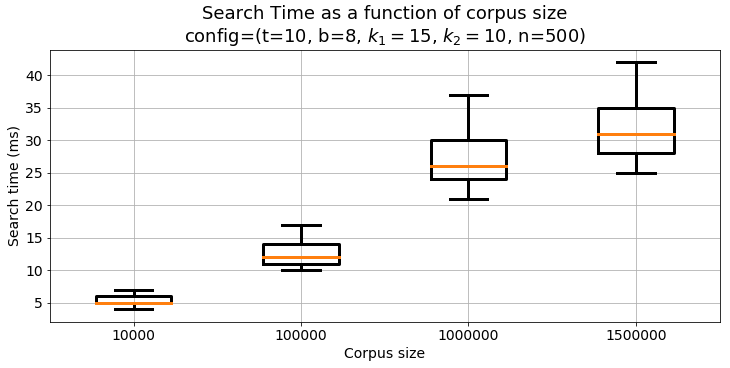

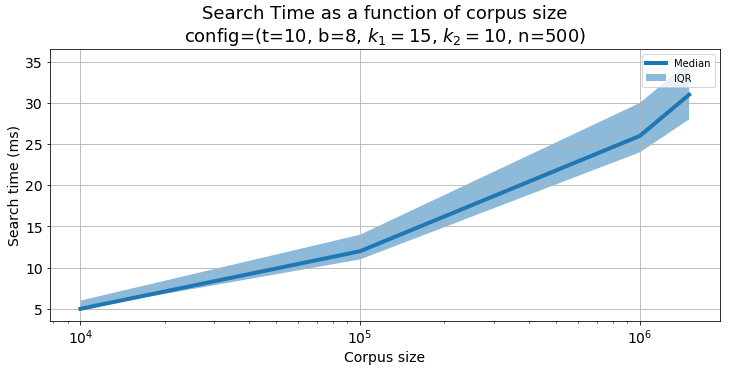

---


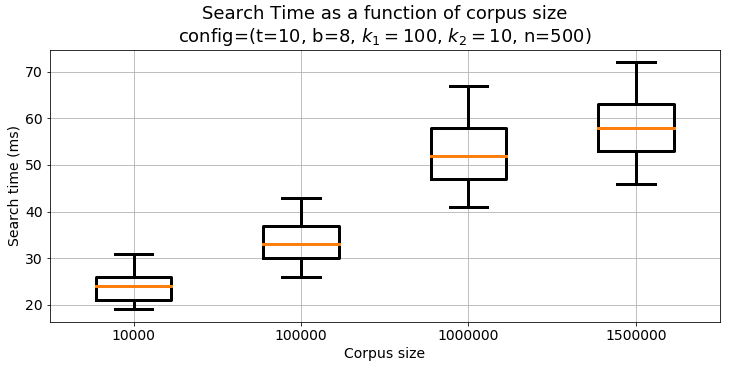

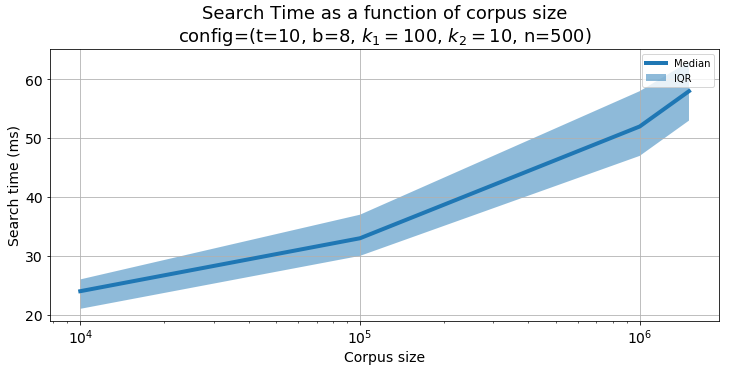

---


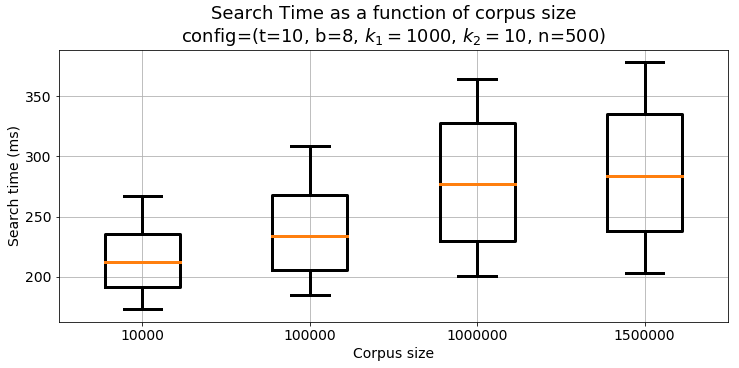

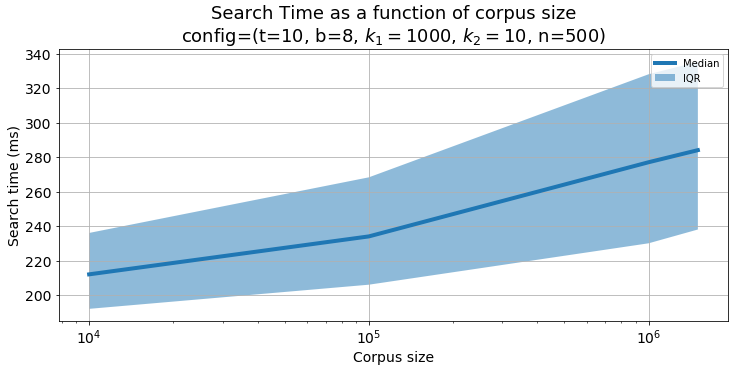

---


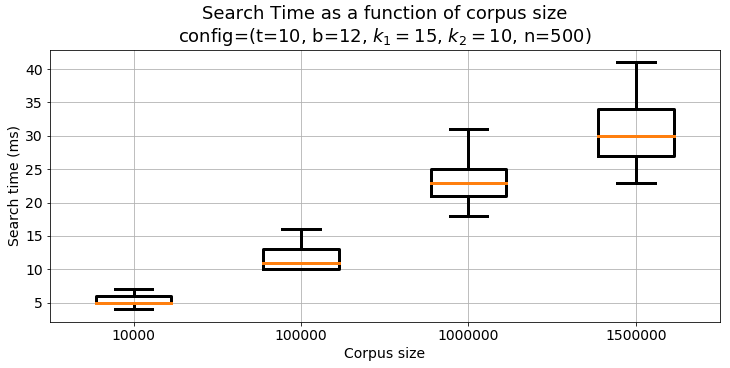

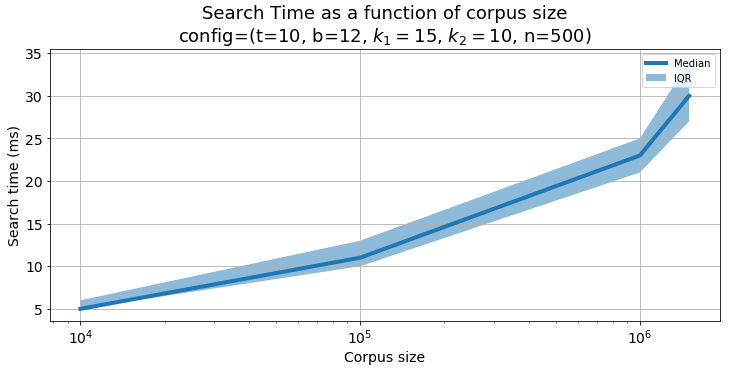

---


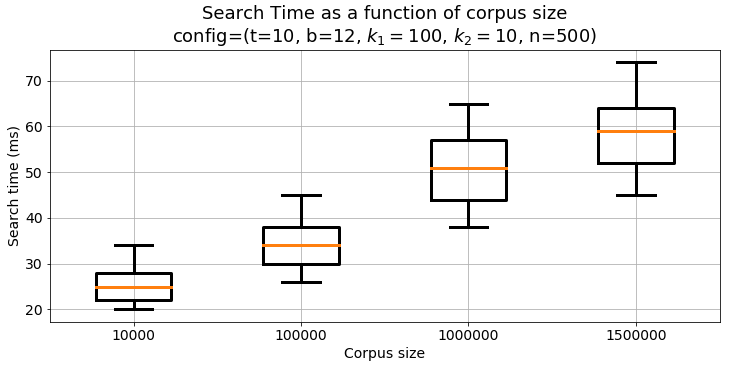

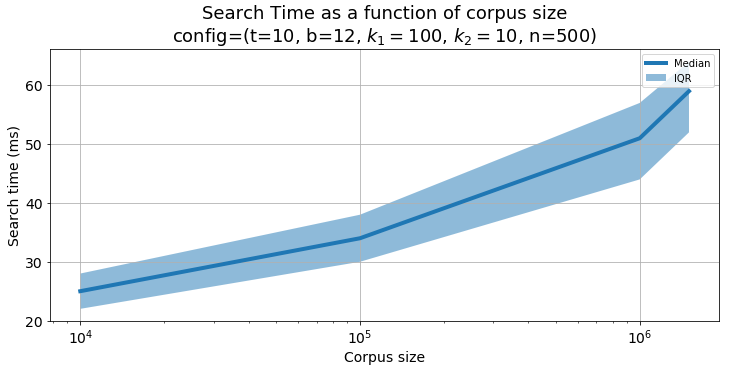

---


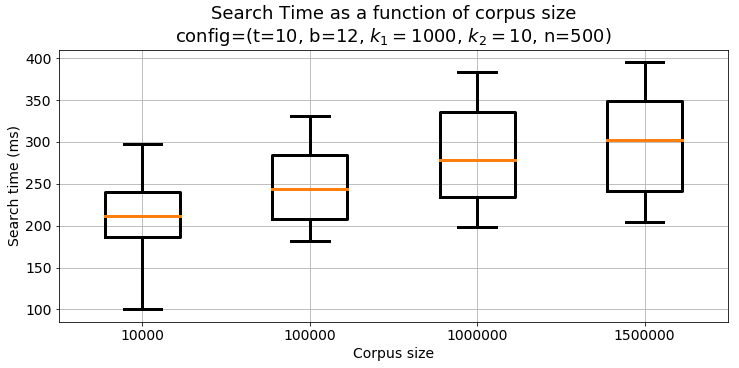

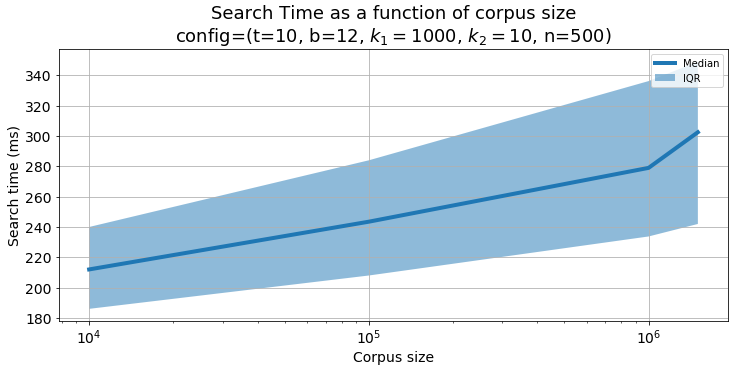

---


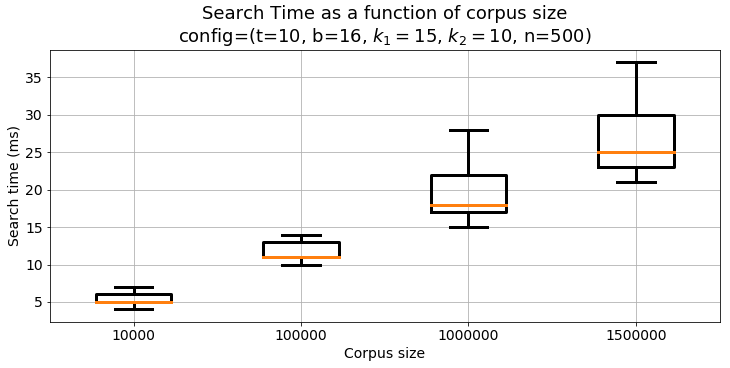

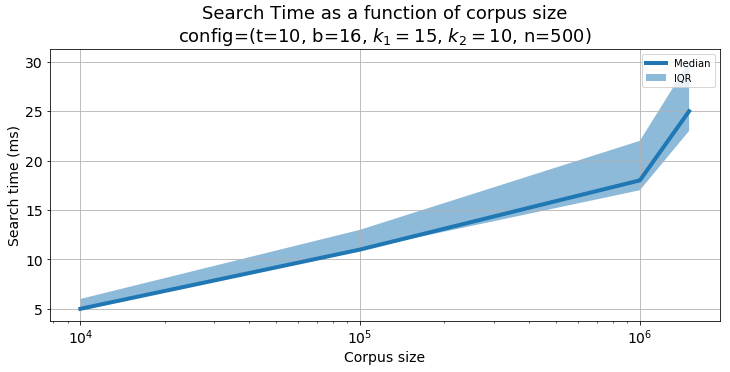

---


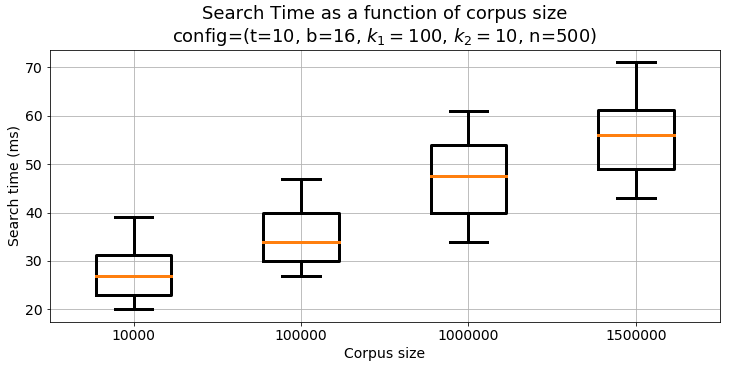

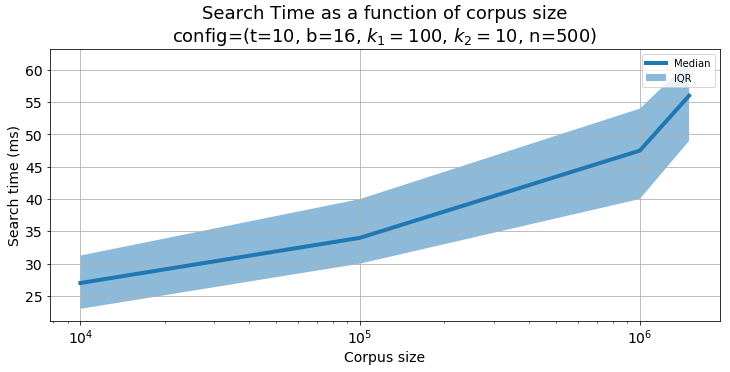

---


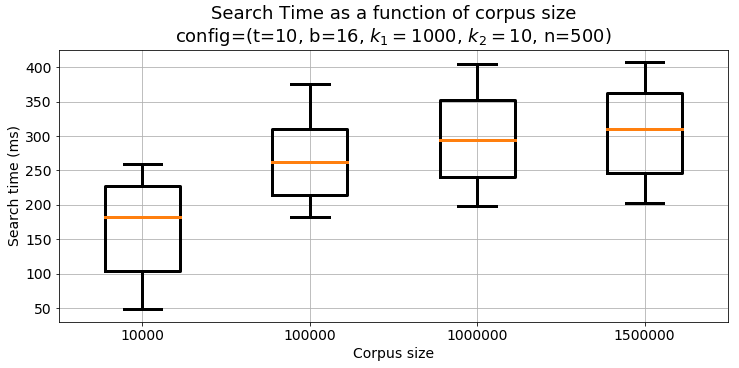

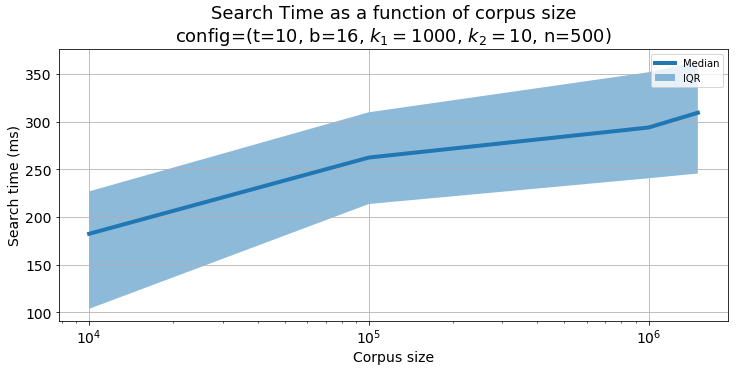

---


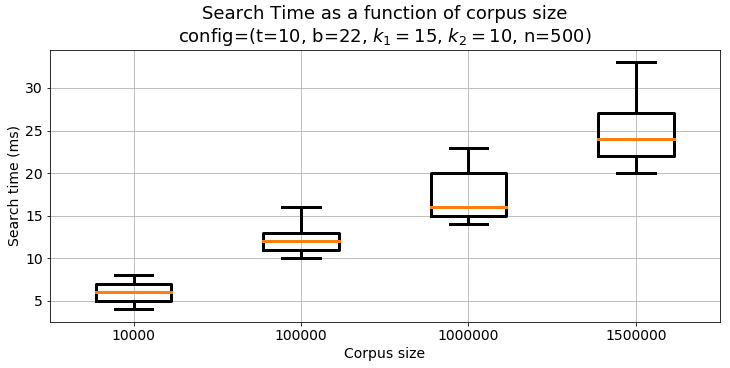

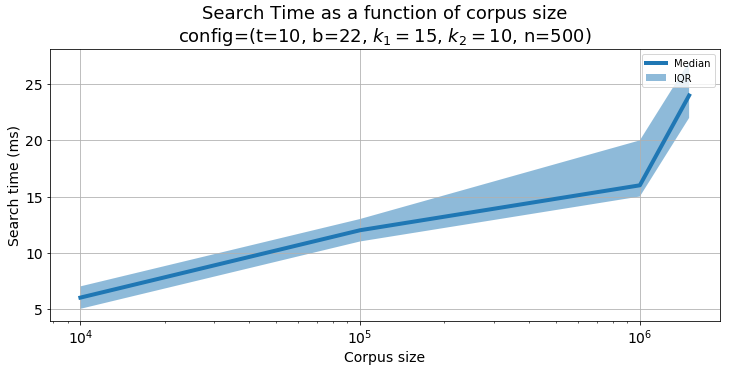

---


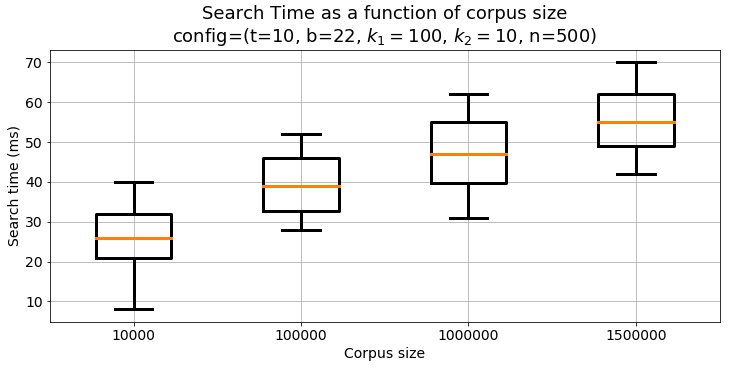

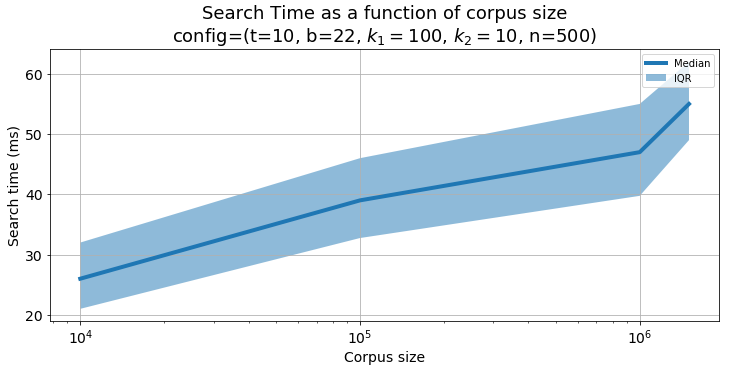

---


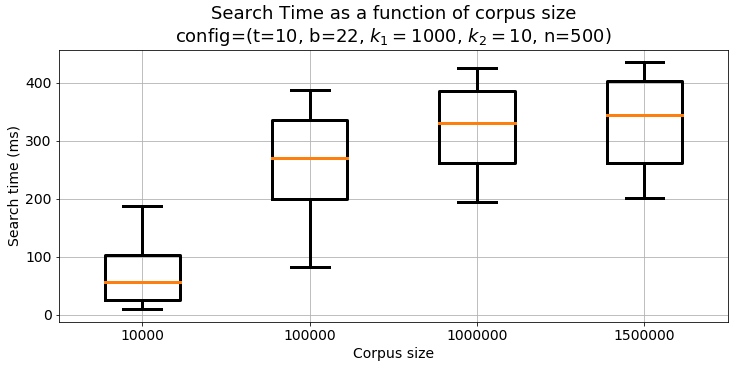

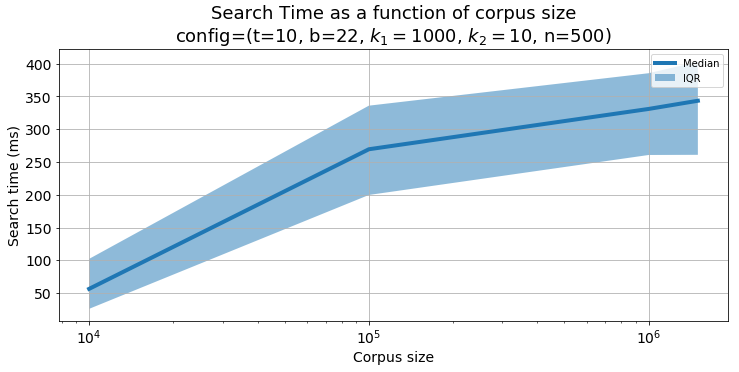

---


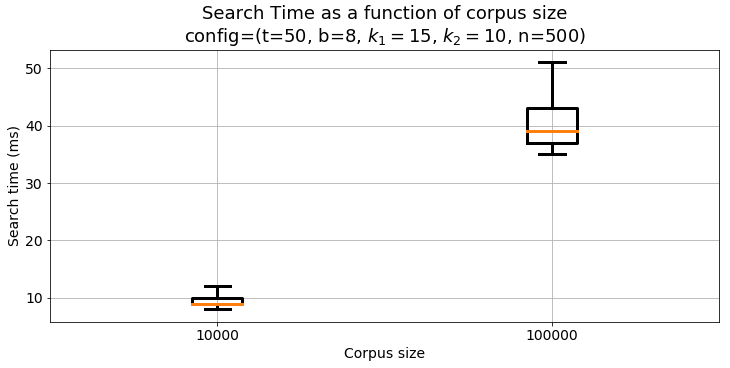

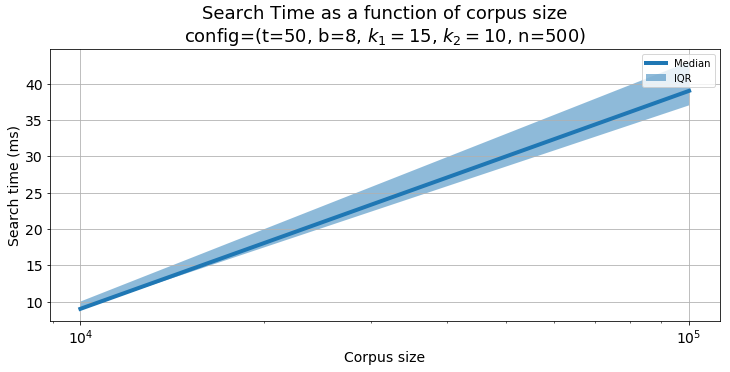

---


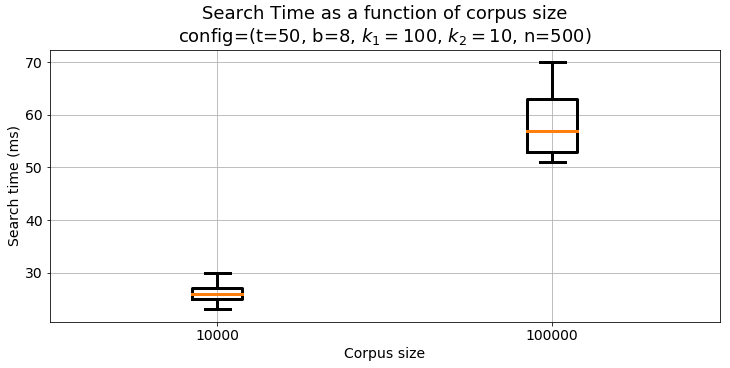

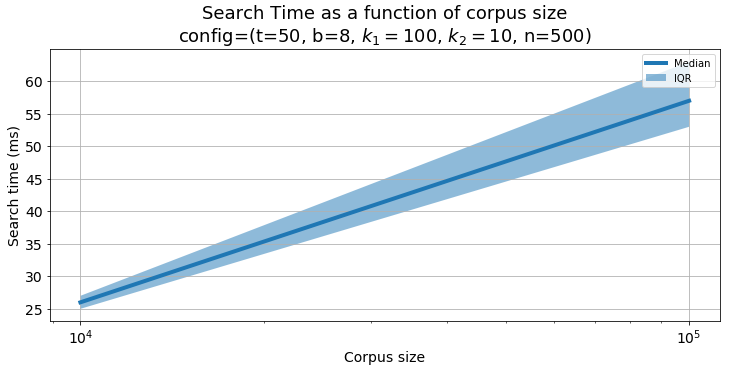

---


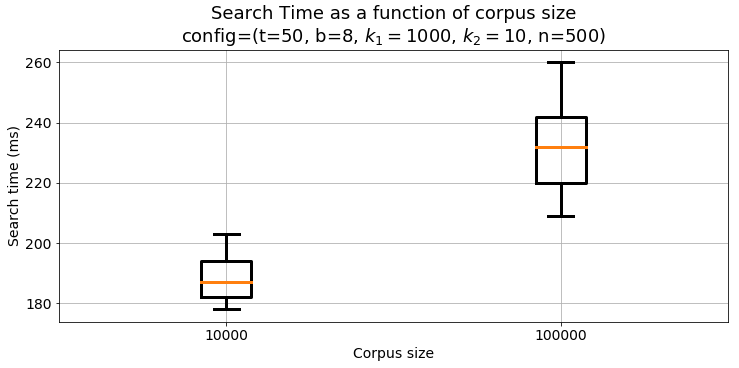

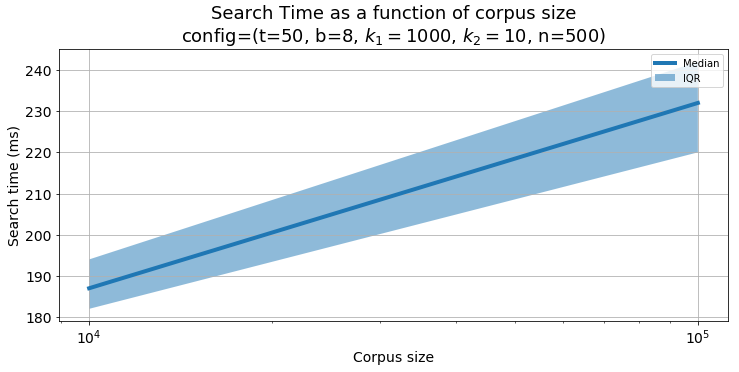

---


In [35]:
# Plot the search times as a function of corpus size.
df = pd.DataFrame(list(iter_metrics()))

for key, df_ in df.groupby(["nb_tables", "nb_bits", "k1", "k2"]):
    df_ = df_.sort_values("nb_docs", ascending=True)
    
    # Boxplot...
    bpdata = df_.search_times.values
    plt.figure(figsize=(12, 5))
    plt.boxplot(bpdata, showfliers=False, 
                whis=[5, 95],
                boxprops={"linewidth": 3},
                medianprops={"linewidth": 3},
                whiskerprops={"linewidth": 3},
                capprops={"linewidth": 3})
    plt.xticks(range(1, len(bpdata) + 1), df_.nb_docs.values, size=14)
    plt.yticks(size=14)
    plt.title("Search Time as a function of corpus size\nconfig=(t=%d, b=%d, $k_1=%d$, $k_2=%d$, n=%d)" % (
        *key, len(bpdata[0])), size=18)
    plt.xlabel("Corpus size", size=14)
    plt.ylabel("Search time (ms)", size=14)
    plt.grid(True)
    plt.show()
    
    # Fancier filled line plot...
    X = df_.nb_docs.values
    Y0 = list(map(lambda Y: np.percentile(Y, 25), df_.search_times))
    YM = list(map(np.median, df_.search_times))
    Y1 = list(map(lambda Y: np.percentile(Y, 75), df_.search_times))
    
    plt.figure(figsize=(12, 5))
    plt.fill_between(X, Y0, Y1, alpha=0.5, label="IQR")
    plt.plot(X, YM, lw=4, label="Median")
    plt.xticks(df_.nb_docs.values, map(lambda x: "$10^%d$" % np.log10(x), df_.nb_docs.values), size=14)
    plt.yticks(size=14)
    plt.title("Search Time as a function of corpus size\nconfig=(t=%d, b=%d, $k_1=%d$, $k_2=%d$, n=%d)" % (
        *key, len(df_.search_times.values[0])), size=18)
    plt.xlabel("Corpus size", size=14)
    plt.ylabel("Search time (ms)", size=14)
    plt.xscale('log')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print("---")

10000 [0.1, 0.15789473684210525, 0.2222222222222222, 0.29411764705882354, 0.4666666666666667, 0.5714285714285714, 0.8333333333333334] [5.0, 26.0, 9.0, 56.5, 26.0, 212.0, 187.0]
100000 [0.047619047619047616, 0.1, 0.15789473684210525, 0.2222222222222222, 0.29411764705882354, 0.6923076923076923] [11.0, 33.0, 39.0, 234.0, 57.0, 232.0]
1000000 [0.047619047619047616] [16.0]
1500000 [0.047619047619047616] [24.0]


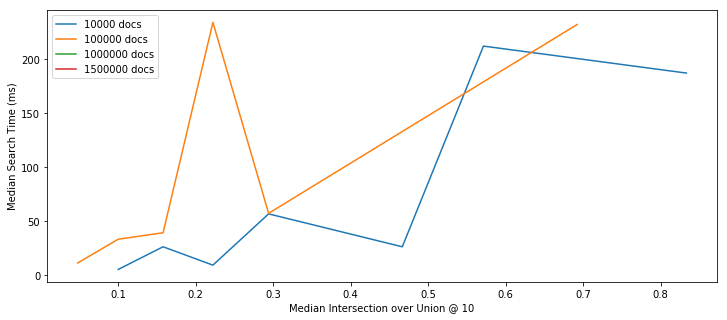

In [34]:
# Plot speed/recall frontier.
# This is the point with the lowest median search time for every unique median IOU, grouped by corpus size.

plt.figure(figsize=(12, 5))
rows = []
for row in iter_metrics():
    row["iou50"] = np.median(row["search_ious"])
    row["time50"] = np.median(row["search_times"])
    rows.append(row)

df = pd.DataFrame(rows)

for nb_docs, df_ in df.groupby(["nb_docs"]):
    X, Y = [], []
    for iou50, df_ in df_.groupby(["iou50"]):
        df_ = df_.sort_values("time50", ascending=True)
        _, r = next(df_.iterrows())
        X.append(iou50)
        Y.append(r.time50)
    print(nb_docs, X, Y)
    plt.plot(X, Y, label="%d docs" % nb_docs)
plt.legend()
plt.ylabel("Median Search Time (ms)")
plt.xlabel("Median Intersection over Union @ 10")
plt.show()

In [ ]:
b